# First Linear REG

In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error as mse, r2_score

In [17]:
d  = load_diabetes()
d

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [18]:
df = pd.DataFrame(d['data'],columns=d['feature_names'])
df['Target'] = d['target']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [19]:
# i have made this dataframe just to show how data looks 

In [20]:
x_train,x_test,y_train,y_test = train_test_split(d['data'],d['target'],test_size=0.2,random_state=42)

In [21]:
# x_train.shape

In [22]:
lr= LinearRegression()

In [23]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred_test= lr.predict(x_test)

In [25]:
print(f"your r2score for linear regession is {r2_score(y_test,y_pred_test)}")

your r2score for linear regession is 0.4526027629719197


In [26]:
print(f"your RMSE for Linear Regression is {np.sqrt(mse(y_test,y_pred_test))}")

your RMSE for Linear Regression is 53.853445836765914


In [27]:
print(lr.coef_)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


# Lasso

In [28]:
# len(aplha)

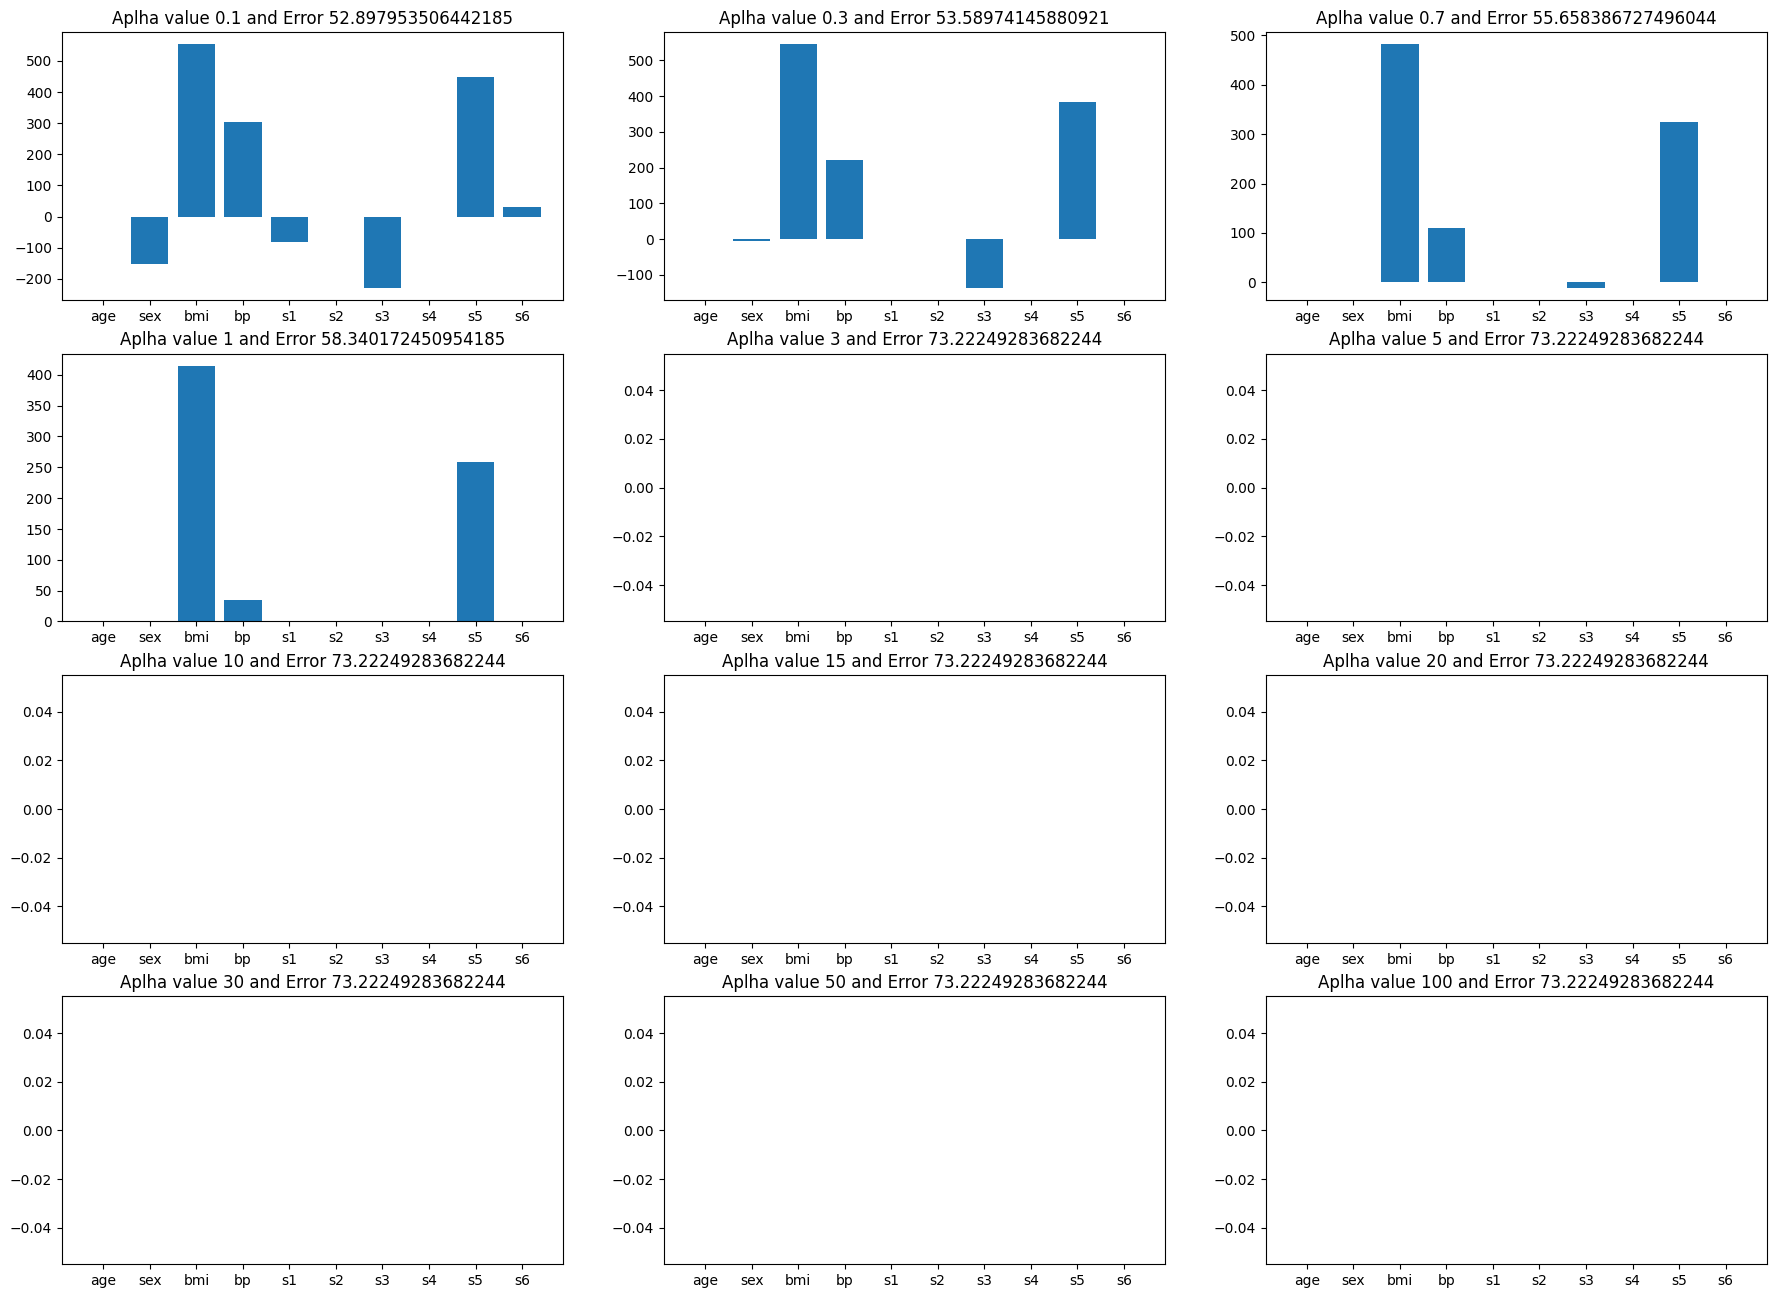

In [30]:
aplha = [0.1,0.3,0.7,1,3,5,10,15,20,30,50,100]
plt.figure(figsize=(22, 16))

err=[]
coef=[]
intercept = []
s=1
k=0
for i in range(len(aplha)):
    l = Lasso(alpha=aplha[i])
    l.fit(x_train,y_train)
    co=l.coef_.tolist()
    coef.append(co)
    intercept.append(l.intercept_)
    y_pred_R = l.predict(x_test)
    rmse = np.sqrt(mse(y_test,y_pred_R))
    err.append(rmse)    
    
    plt.subplot(4,3,s)
    plt.title(f"Aplha value {aplha[i]} and Error {err[i]}")
    plt.bar(d['feature_names'],coef[k])
    s+=1
    k+=1


#print(f"your coef are {coef}")

    









    